Univerzitet u Sarajevu
<br> Elektrotehnički fakultet
#### **Predmet: Multimedijalni Sistemi**

# Laboratorijska vježba 05: Fourierovi redovi  

Za izradu laboratorijske vježbe treba koristiti odgovarajuću Jupyter Notebook datoteku. Urađenu vježbu je potrebno konvertirati u PDF format, a zatim je PDF datoteku potrebno predati do postavljenog roka koristeći platformu Zamger.

Ime i prezime studenta, broj indeksa:

Amar Hasečić, 2116/18673

Datum izrade izvještaja:

12.4.2024

---

## Zadatak 1.

Potrebno je implementirati funkciju <code>fourier</code> koja izračunava Fourierove koeficijente a<sub>0</sub>, a<sub>*i*</sub> i b<sub>*i*</sub>, *i* =1, 2, 3..., za funkciju proslijeđenu kao parametar. Osim funkcije, kao parametar se prosljeđuje i period funkcije, kao i broj članova u redu (što zapravo određuje preciznost rekonstrukcije originalne funkcije).

Vrijednosti a<sub>0</sub>, a<sub>*i*</sub> i b<sub>*i*</sub> se izračunavaju prema sljedećim formulama:

![](https://docs.google.com/uc?export=download&id=1gOT9cGip3E1MBPdWu7eHnb6dYQ_Jq8eY)

Nije potrebno ručno izračunavati vrijednosti integrala a zatim te vrijednosti koristiti u formulama. Za integriranje možete koristiti funkcija <code>quad</code> iz biblioteke <code>scipy</code>. Ova funkcija kao parametar prima željenu funkciju koju je potrebno integrirati, donju granicu integrala i gornju granicu integrala. Kao rezultat vraća dvije vrijednosti: vrijednost integrala i procjenu apsolutne greške u rezultatu integracije.

Detaljnije informacije o Fourierovim redovima moguće je pronaći u PDF materijalima u poglavlju 3 (str. 59).

U nastavku su data definicije periodičnih funkcija <code>square</code>, <code>triangle</code> i <code>impulse</code> za koje je potrebno izračunati Fourierove koeficijente. U nastavku su također dati i grafički prikazi navedenih funkcija. Sve navedene funkcije imaju period T=2$\pi$.  

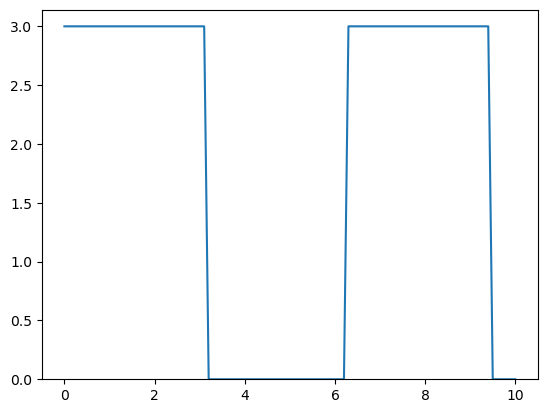

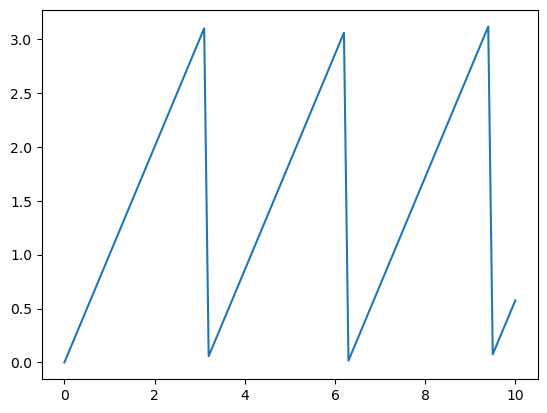

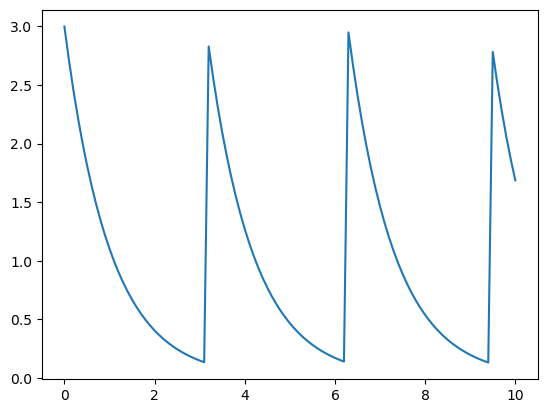

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp 

def square(x, h = 3):
    ugao = x % (2 * np.pi)
    if 0.0 <= ugao < np.pi:
        return h
    else:
        return 0

def triangle(x):
  return x % (np.pi)

def impulse(x, h=3):
  x = x % (np.pi)
  return 3*exp(-x) % (np.pi) 


    
x = [0.0]

f1 = []
f2 = []
f3 = []
   
for i in range(0, 100):
    f1.append(square(x[len(x) - 1]))
    f2.append(triangle(x[len(x) - 1]))
    f3.append(impulse(x[len(x) - 1]))
    x.append(x[len(x) - 1] + 0.1)
f1.append(square(x[len(x) - 1]))
f2.append(triangle(x[len(x) - 1]))
f3.append(impulse(x[len(x) - 1]))

plt.ylim(0, np.pi)
plt.figure(1)
plt.plot(x, f1)
plt.figure(2)
plt.plot(x, f2)
plt.figure(3)
plt.plot(x, f3)

**Rješenje:**

In [29]:
from scipy import integrate
import math
import inspect



def fourier(f, T, br_clanova):

    a0 = (1 / T) * integrate.quad(f, 0, T)[0]
    an = [(1/(0.5*T))* integrate.quad(lambda x: f(x) * math.cos(i * x), 0, T)[0] for i in range(1, br_clanova)]
    bn = [(1/(0.5*T)) * integrate.quad(lambda x: f(x) * math.sin(i * x), 0, T)[0] for i in range(1, br_clanova)]

    return [a0, an, bn]


Nakon implementacije funkcije <code>fourier</code>, treba biti moguće izvršiti programski kod ispod tako da daje prikazani ispis. Vrijednosti a01, a02 i a03 predstavljaju koeficijent a<sub>0</sub> za funkcije <code>sqare</code>, <code>triangle</code> i <code>impulse</code>, respektivno. U listama an1, bn1 se trebaju nalaziti koeficijenti a<sub>*i*</sub> i b<sub>*i*</sub> za funkciju <code>square</code>. Nadalje, u listama an2, bn2 se trebaju nalaziti koeficijenti a<sub>*i*</sub> i b<sub>*i*</sub> za funkciju <code>triangle</code>, dok se u listama an3 i bn3 trebaju nalaziti koeficijenti a<sub>*i*</sub> i b<sub>*i*</sub> za funkciju <code>impulse</code>. 

In [3]:
[a01, an1, bn1] = fourier(square, 2 * np.pi, 50)

print("Koeficijent a01 iznosi " + str(round(a01, 2)))

print("\nKoeficijenti ai1 su: ")
an1_string = ""
for i in range(0, len(an1)):
    an1_string += str(round(an1[i], 2)) + " "
    
print(an1_string)

print("\nKoeficijenti bi1 su: ")
bn1_string = ""
for i in range(0, len(bn1)):
    bn1_string += str(round(bn1[i], 2)) + " "
    
print(bn1_string)

[a02, an2, bn2] = fourier(triangle, 2 * np.pi, 50)

print("\n\nKoeficijent a02 iznosi " + str(round(a02, 2)))

print("\nKoeficijenti ai2 su: ")
an2_string = ""
for i in range(0, len(an2)):
    an2_string += str(round(an2[i], 2)) + " "
    
print(an2_string)

print("\nKoeficijenti bi2 su: ")
bn2_string = ""
for i in range(0, len(bn2)):
    bn2_string += str(round(bn2[i], 2)) + " "
    
print(bn2_string)

[a03, an3, bn3] = fourier(impulse, 2 * np.pi, 50)

print("\n\nKoeficijent a03 iznosi " + str(round(a03, 2)))

print("\nKoeficijenti ai3 su: ")
an3_string = ""
for i in range(0, len(an3)):
    an3_string += str(round(an2[i], 2)) + " "
    
print(an3_string)

print("\nKoeficijenti bi3 su: ")
bn3_string = ""
for i in range(0, len(bn3)):
    bn3_string += str(round(bn3[i], 2)) + " "
    
print(bn3_string)

Koeficijent a01 iznosi 1.5

Koeficijenti ai1 su: 
0.0 0.0 -0.0 -0.0 0.0 -0.0 -0.0 -0.0 0.0 -0.0 0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 0.0 -0.0 -0.0 0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 0.0 -0.0 -0.0 0.0 0.0 -0.0 0.0 -0.0 -0.0 0.0 0.0 -0.0 -0.0 0.0 -0.0 0.0 -0.0 0.0 -0.0 -0.0 0.0 

Koeficijenti bi1 su: 
1.91 0.0 0.64 -0.0 0.38 0.0 0.27 -0.0 0.21 -0.0 0.17 0.0 0.15 -0.0 0.13 0.0 0.11 -0.0 0.1 -0.0 0.09 0.0 0.08 -0.0 0.08 -0.0 0.07 -0.0 0.07 0.0 0.06 -0.0 0.06 0.0 0.05 -0.0 0.05 -0.0 0.05 0.0 0.05 -0.0 0.04 -0.0 0.04 -0.0 0.04 -0.0 0.04 


Koeficijent a02 iznosi 1.57

Koeficijenti ai2 su: 
-0.0 -0.0 0.0 -0.0 0.0 -0.0 0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 0.0 0.0 0.0 0.0 -0.0 0.0 0.0 -0.0 0.0 -0.0 0.0 0.0 -0.0 -0.0 -0.0 0.0 -0.0 0.0 0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 0.0 0.0 0.0 0.0 0.0 -0.0 0.0 

Koeficijenti bi2 su: 
0.0 -1.0 -0.0 -0.5 0.0 -0.33 -0.0 -0.25 -0.0 -0.2 -0.0 -0.17 0.0 -0.14 0.0 -0.13 -0.0 -0.11 0.0 -0.1 -0.0 -0.09 0.0 -0.08 0.0 -0.08 0.0 -0.07 0.0 -0.07 -0.0 -0.

---

## Zadatak 2.

Potrebno je implementirati funkciju <code>f_rekonstrukcija</code> koja rekonstruira vrijednosti funkcije na nekom segmentu na temelju Fourierovih koeficijenata koji su izračunati u prethodnom zadatku.

Za rekonstrukciju funkcije u nekoj tački x koristi se sljedeća formula:

![](https://docs.google.com/uc?export=download&id=1T10uhslSFwuZcN6I09hC3sRd1tZC7ijG)

Rekonstrukcija se izvodi u tačkama x koje su definirane parametrima: početak segmenta, kraj segmenta i step. Naprimjer, za početak segmenta 0, kraj segmenta 0.5 i step 0.1, vrijednosti x za koje se rekonstruira funkcija su: 0.0, 0.1, 0.2, 0.3, 0.4 i 0.5.

Funkcija  <code>f_rekonstrukcija</code> kao parametre prima:  k (broj komponenti, tj. harmonika na temelju kojih se izvodi rekonstrukcija), fun (funkcija koja se rekonstruira), prethodno izračunate koeficijente a0, an i bn, start (početak segmenta), end (kraj segmenta), step (korak diskretizacije). 

Funkcija <code>f_rekonstrukcija</code> kao rezultat vraća liste x i y. U listi x su pohranjene sve vrijednosti x, dok su u listi y pohranjene rekonstruirane vrijednosti funkcije.

**Rješenje:**

Nakon implementacije funkcije, potrebno je biti moguće izvršiti programski kod ispod tako da se dobije prikazani grafički prikaz rekonstruiranih funkcija. U primjerima ispod je primijenjena rekonstrukcija korištenjem, 3, 8 i 20 komponenti (harmonika). Za testiranje dodajte još primjere koji koriste 16 i 50 komponenti.

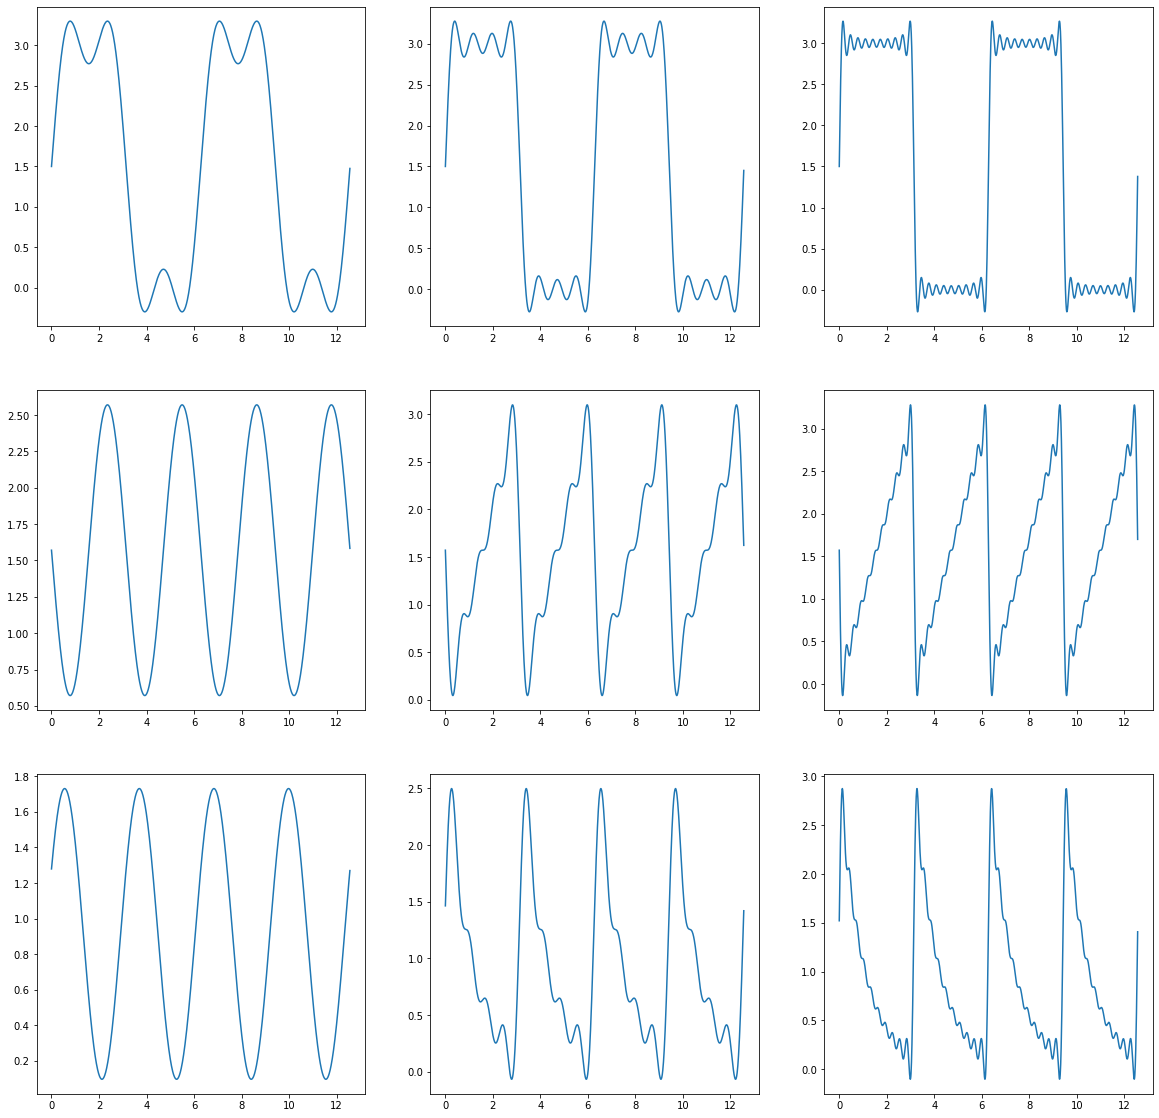

In [5]:
[x, rf1_3] = f_rekonstrukcija(3,square, a01, an1, bn1, 0, 4 * np.pi, 0.01)
[x, rf1_8] = f_rekonstrukcija(8,square, a01, an1, bn1, 0, 4 * np.pi, 0.01)
[x, rf1_20] = f_rekonstrukcija(20,square, a01, an1, bn1, 0, 4 * np.pi, 0.01)

[x, rf2_3] = f_rekonstrukcija(3,triangle, a02, an2, bn2, 0, 4 * np.pi, 0.01)
[x, rf2_8] = f_rekonstrukcija(8,triangle, a02, an2, bn2, 0, 4 * np.pi, 0.01)
[x, rf2_20] = f_rekonstrukcija(20,triangle, a02, an2, bn2, 0, 4 * np.pi, 0.01)

[x, rf3_3] = f_rekonstrukcija(3,impulse, a03, an3, bn3, 0, 4 * np.pi, 0.01)
[x, rf3_8] = f_rekonstrukcija(8,impulse, a03, an3, bn3, 0, 4 * np.pi, 0.01)
[x, rf3_20] = f_rekonstrukcija(20,impulse, a03, an3, bn3, 0, 4 * np.pi, 0.01)


fig, axs = plt.subplots(3,3,figsize=(20,20))

axs[0,0].plot(x,rf1_3)
axs[0,1].plot(x,rf1_8)
axs[0,2].plot(x,rf1_20)

axs[1,0].plot(x,rf2_3)
axs[1,1].plot(x,rf2_8)
axs[1,2].plot(x,rf2_20)

axs[2,0].plot(x,rf3_3)
axs[2,1].plot(x,rf3_8)
axs[2,2].plot(x,rf3_20)
